## Dataset Link - https://www.kaggle.com/datasets/meirnizri/covid19-dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

USMER                    - Indicates whether the patient treated medical units of the first, second or third level. <br><br>
MEDICAL_UNIT             - type of institution of the National Health System that provided the care.<br><br>
SEX                      - 1 for female and 2 for male.<br><br>
PATIENT_TYPE             - type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.<br><br>
DATE_DIED                - If the patient died indicate the date of death, and 9999-99-99 otherwise.           <br><br>
INTUBED                  - whether the patient was connected to the ventilator.<br><br>
PNEUMONIA                - whether the patient already have air sacs inflammation or not.<br><br>
AGE                      - age of the patient.<br><br>
PREGNANT                 - whether the patient is pregnant or not.<br><br>
DIABETES                 - whether the patient has diabetes or not.<br><br>
COPD                     - Indicates whether the patient has Chronic obstructive pulmonary disease or not.<br><br>
ASTHMA                   - whether the patient has asthma or not.<br><br>
INMSUPR                  - whether the patient is immunosuppressed or not.<br><br>
HIPERTENSION             - whether the patient has hypertension or not.<br><br>
OTHER_DISEASE            - whether the patient has other disease or not.<br><br>
CARDIOVASCULAR           - whether the patient has heart or blood vessels related disease.<br><br>
OBESITY                  - whether the patient is obese or not.<br><br>
RENAL_CHRONIC            - whether the patient has chronic renal disease or not.<br><br>
TOBACCO                  - whether the patient is a tobacco user.<br><br>
ICU                      - Indicates whether the patient had been admitted to an Intensive Care Unit.<br><br>


CLASIFFICATION_FINAL     - covid test findings. 1 for positive, 2 for negative            

In [2]:
df = pd.read_csv("dataset/covid_data.csv")

In [3]:
df.replace([97, 98, 99], np.nan, inplace=True) # Because values 97, 99 represent missing values

In [4]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [5]:
df['DIED'] = (df['DATE_DIED'] != '9999-99-99').astype(int)

In [6]:
df['CLASIFFICATION_FINAL'] = [1 if i <= 3 else 2 for i in df['CLASIFFICATION_FINAL']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             1048575 non-null  object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048230 non-null  float64
 8   PREGNANT              521310 non-null   float64
 9   DIABETES              1045237 non-null  float64
 10  COPD                  1045572 non-null  float64
 11  ASTHMA                1045596 non-null  float64
 12  INMSUPR               1045171 non-null  float64
 13  HIPERTENSION          1045471 non-null  float64
 14  OTHER_DISEASE         1043530 non-

### Number of unique values in dataframe

In [8]:
for i in df.columns:
    print(f"{i} : {df[i].nunique()}")

USMER : 2
MEDICAL_UNIT : 13
SEX : 2
PATIENT_TYPE : 2
DATE_DIED : 401
INTUBED : 2
PNEUMONIA : 2
AGE : 118
PREGNANT : 2
DIABETES : 2
COPD : 2
ASTHMA : 2
INMSUPR : 2
HIPERTENSION : 2
OTHER_DISEASE : 2
CARDIOVASCULAR : 2
OBESITY : 2
RENAL_CHRONIC : 2
TOBACCO : 2
CLASIFFICATION_FINAL : 2
ICU : 2
DIED : 2


### All unique values in DF

In [9]:
for i in df.columns:
    if df[i].nunique() < 20:
        print(f"{i} : {df[i].unique()}")

USMER : [2 1]
MEDICAL_UNIT : [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX : [1 2]
PATIENT_TYPE : [1 2]
INTUBED : [nan  1.  2.]
PNEUMONIA : [ 1.  2. nan]
PREGNANT : [ 2. nan  1.]
DIABETES : [ 2.  1. nan]
COPD : [ 2.  1. nan]
ASTHMA : [ 2.  1. nan]
INMSUPR : [ 2.  1. nan]
HIPERTENSION : [ 1.  2. nan]
OTHER_DISEASE : [ 2.  1. nan]
CARDIOVASCULAR : [ 2.  1. nan]
OBESITY : [ 2.  1. nan]
RENAL_CHRONIC : [ 2.  1. nan]
TOBACCO : [ 2.  1. nan]
CLASIFFICATION_FINAL : [1 2]
ICU : [nan  2.  1.]
DIED : [1 0]


### Number of missing values

In [10]:
for i in df.columns:
    num_na = df[i].isna().sum()
    if num_na > 0:
        print(f"{i} : {num_na} ({round((num_na * 100) / 1048575, 2)} % NULL)")
    else:
        print(f"{i} : {num_na}")

USMER : 0
MEDICAL_UNIT : 0
SEX : 0
PATIENT_TYPE : 0
DATE_DIED : 0
INTUBED : 855869 (81.62 % NULL)
PNEUMONIA : 16003 (1.53 % NULL)
AGE : 345 (0.03 % NULL)
PREGNANT : 527265 (50.28 % NULL)
DIABETES : 3338 (0.32 % NULL)
COPD : 3003 (0.29 % NULL)
ASTHMA : 2979 (0.28 % NULL)
INMSUPR : 3404 (0.32 % NULL)
HIPERTENSION : 3104 (0.3 % NULL)
OTHER_DISEASE : 5045 (0.48 % NULL)
CARDIOVASCULAR : 3076 (0.29 % NULL)
OBESITY : 3032 (0.29 % NULL)
RENAL_CHRONIC : 3006 (0.29 % NULL)
TOBACCO : 3220 (0.31 % NULL)
CLASIFFICATION_FINAL : 0
ICU : 856032 (81.64 % NULL)
DIED : 0


In [11]:
df.groupby('CLASIFFICATION_FINAL')[['ICU', 'INTUBED']].mean() # This shows that covid doesnt depends on ICU or intubed columns


,ICU,INTUBED
CLASIFFICATION_FINAL,,
1,1.904811,1.784385
2,1.922570,1.879581


In [12]:
df.drop(labels=['ICU', 'INTUBED'], axis=1, inplace=True) # Because too many missing values

In [13]:
df['PREGNANT'] = df['PREGNANT'].fillna(2.0) # mode = 2.0 means not pregnant

In [14]:
# Rest all null values are in significant

df.dropna(inplace=True)

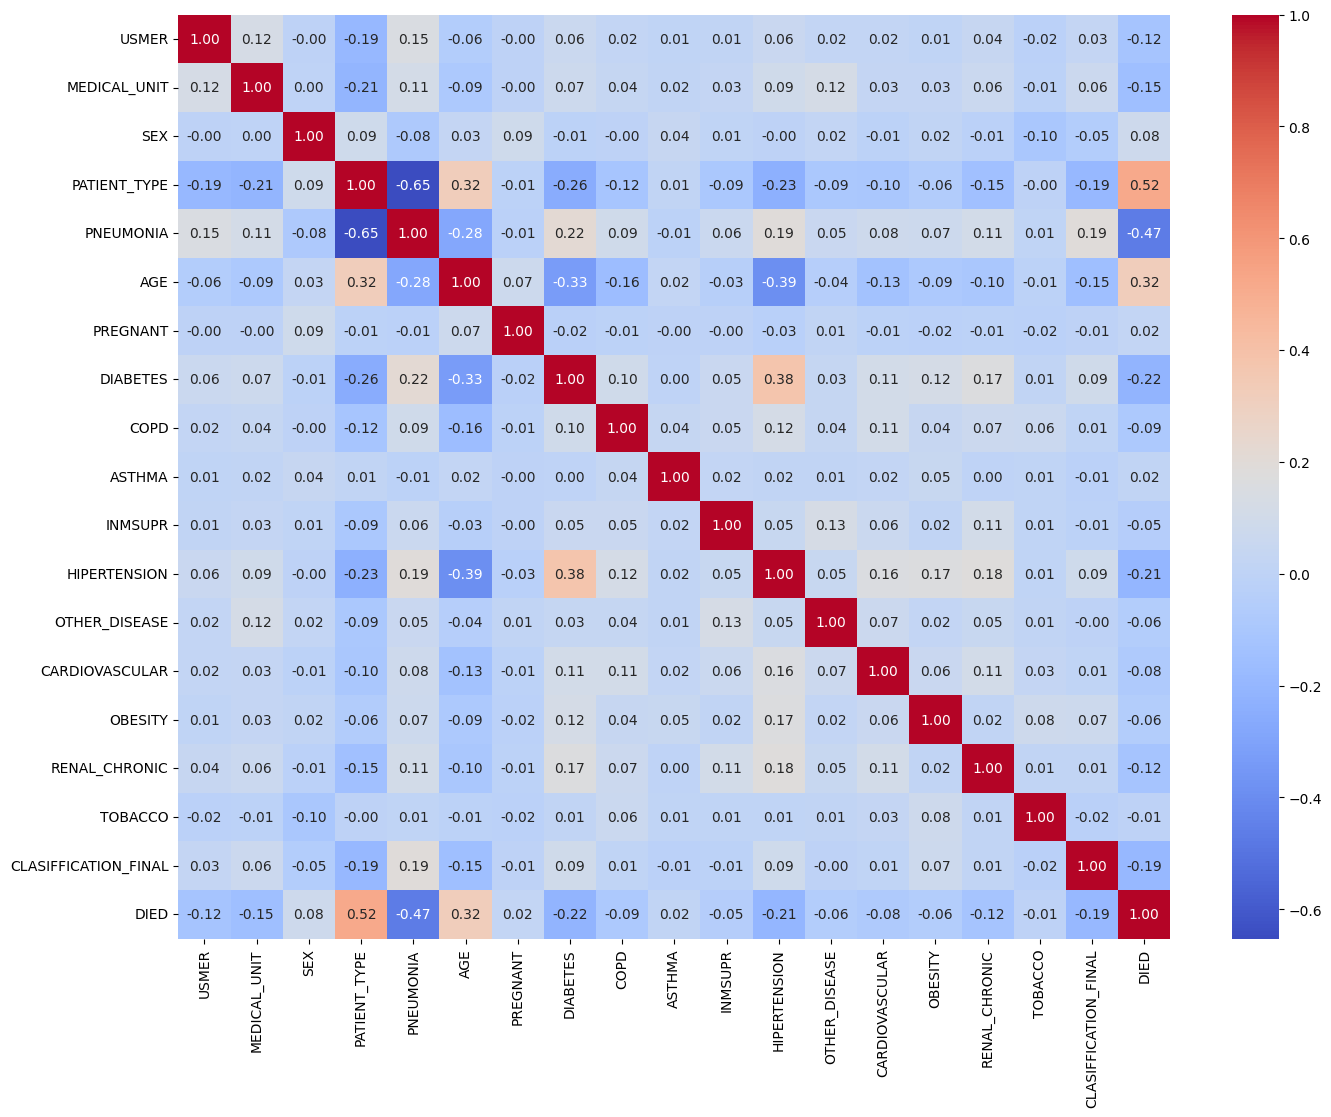

In [15]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.drop(['DATE_DIED'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [16]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,03/05/2020,1.0,65.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1
1,2,1,2,1,03/06/2020,1.0,72.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2,1
2,2,1,2,2,09/06/2020,2.0,55.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1
3,2,1,1,1,12/06/2020,2.0,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1
4,2,1,2,1,21/06/2020,2.0,68.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1


In [28]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['AGE'] < Q1 - 1.5 * IQR) | (df['AGE'] > Q3 + 1.5 * IQR)]
outliers

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED


In [29]:
df = df[(df['AGE'] >= Q1 - 1.5 * IQR) & (df['AGE'] <= Q3 + 1.5 * IQR)]

<Axes: ylabel='AGE'>

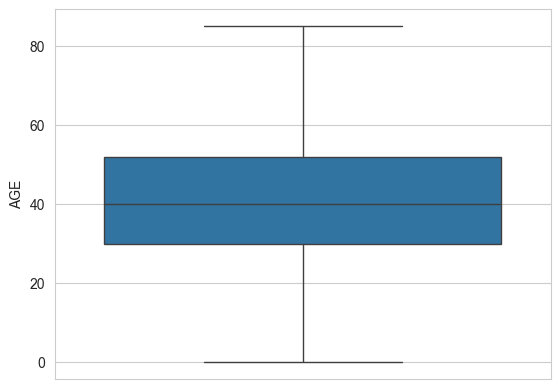

In [30]:
sns.boxplot(df['AGE'])

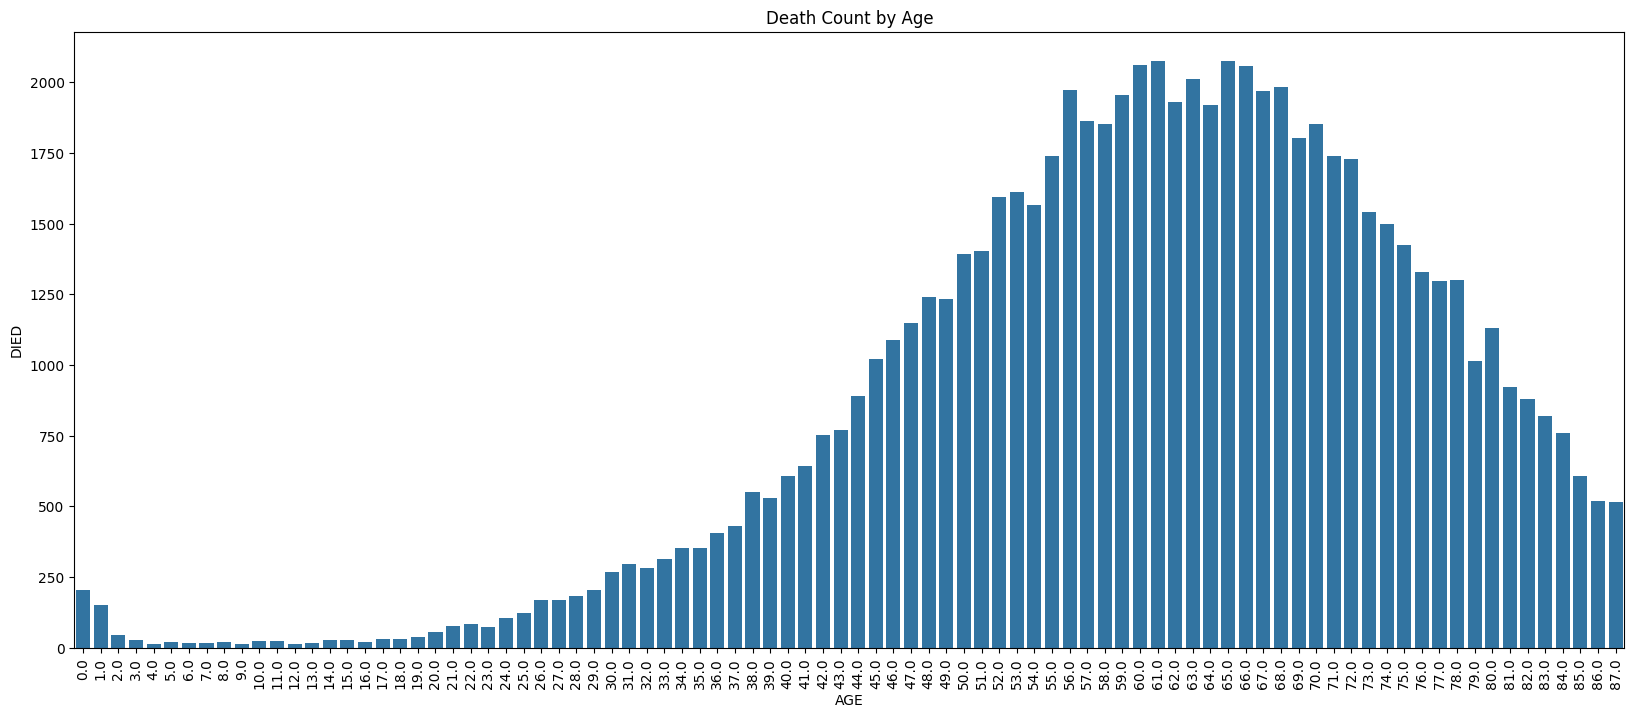

In [20]:
plt.figure(figsize=(20, 8))
sns.barplot(df.groupby("AGE")["DIED"].sum())

plt.xticks(rotation=90)
plt.title("Death Count by Age")
plt.show()


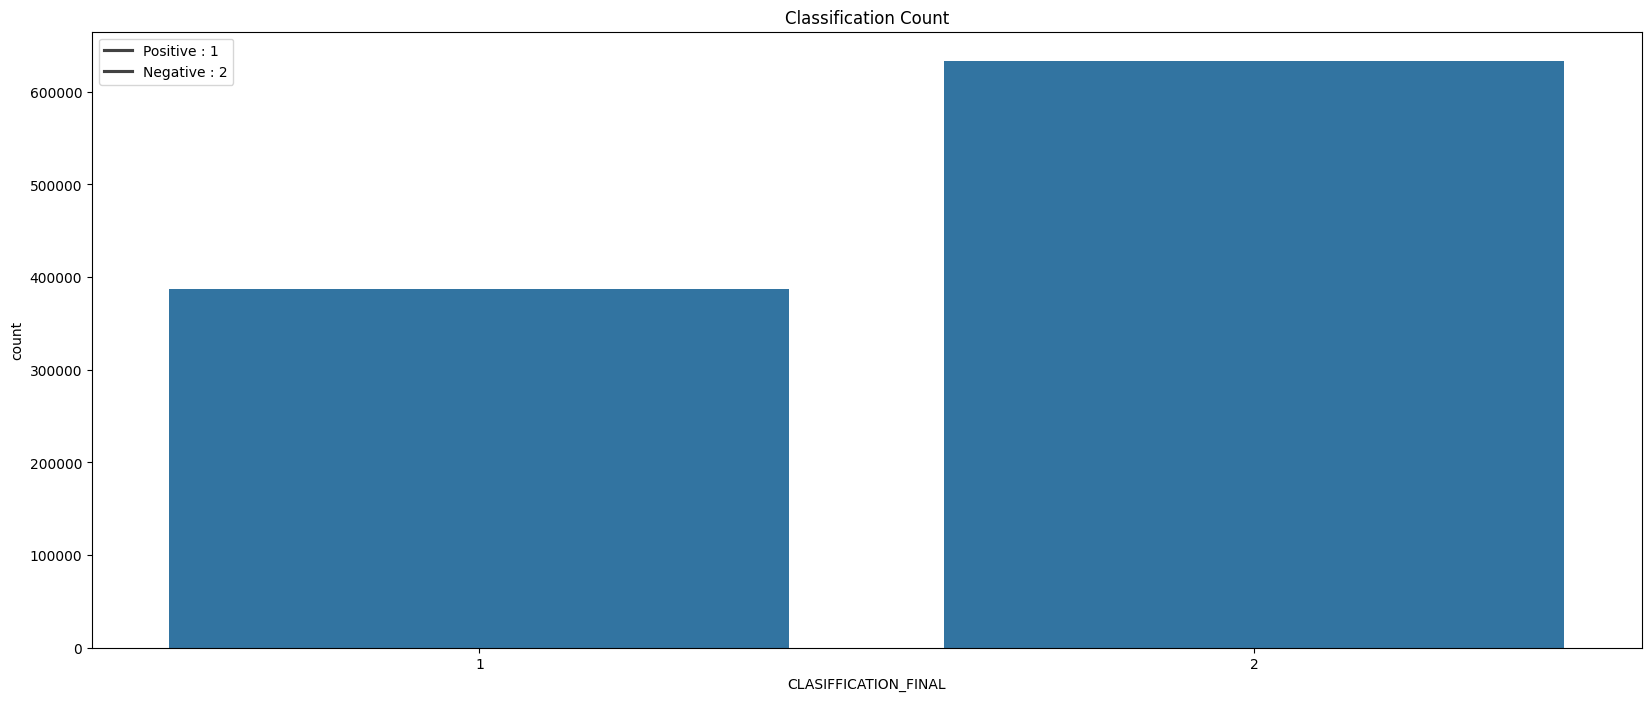

CLASIFFICATION_FINAL
2    633136
1    386682
Name: count, dtype: int64

In [21]:
plt.figure(figsize=(20, 8))
sns.barplot(df['CLASIFFICATION_FINAL'].value_counts())

plt.title("Classification Count")
plt.legend(['Positive : 1', 'Negative : 2'])
plt.show()


df['CLASIFFICATION_FINAL'].value_counts()

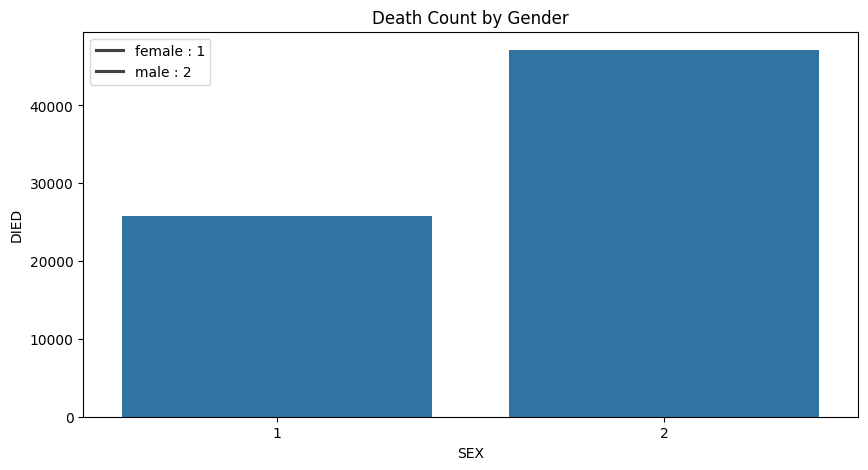

SEX
1    25800
2    47116
Name: DIED, dtype: int64

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(df.groupby("SEX")["DIED"].sum())

# plt.xticks(rotation=90)
plt.title("Death Count by Gender")
plt.legend(['female : 1', 'male : 2'])
plt.show()
df.groupby("SEX")["DIED"].sum()

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
conditions = ['USMER', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

<Figure size 1500x1000 with 0 Axes>

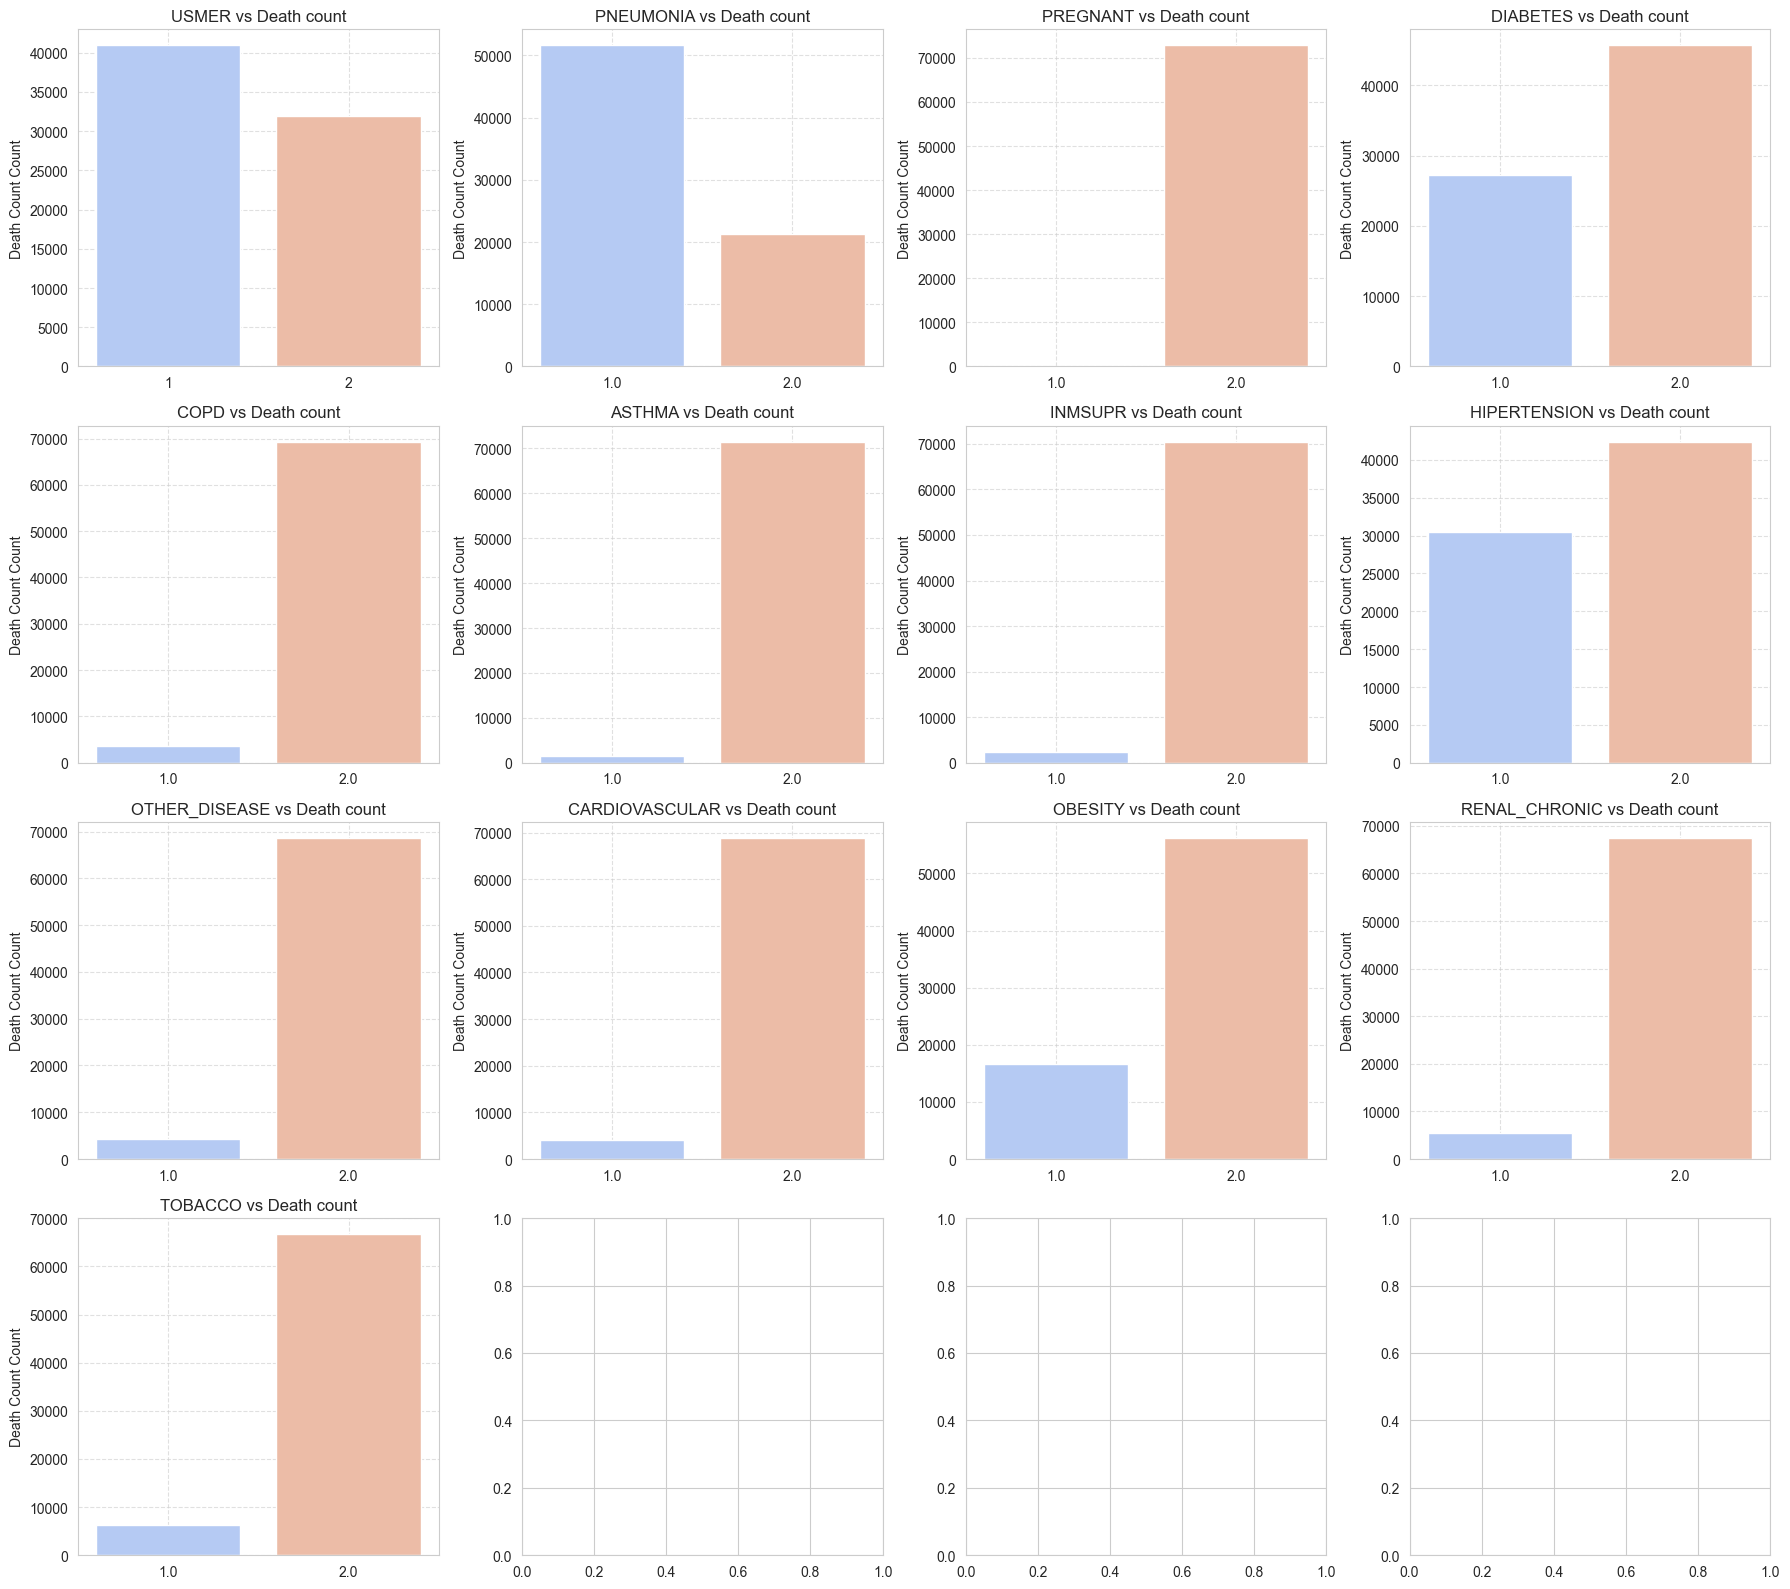

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
for i, condition in enumerate(conditions):
    row, col = divmod(i, 4) 
    ax = axes[row, col]

    sns.barplot(df.groupby(condition)["DIED"].sum(), ax=ax, palette='coolwarm')

    ax.set_title(f"{condition} vs Death count", fontsize=12)
    ax.set_xlabel("") 
    ax.set_ylabel("Death Count Count")
    ax.grid(True, linestyle="--", alpha=0.6) 

# Adjust layout
plt.tight_layout()
plt.show()


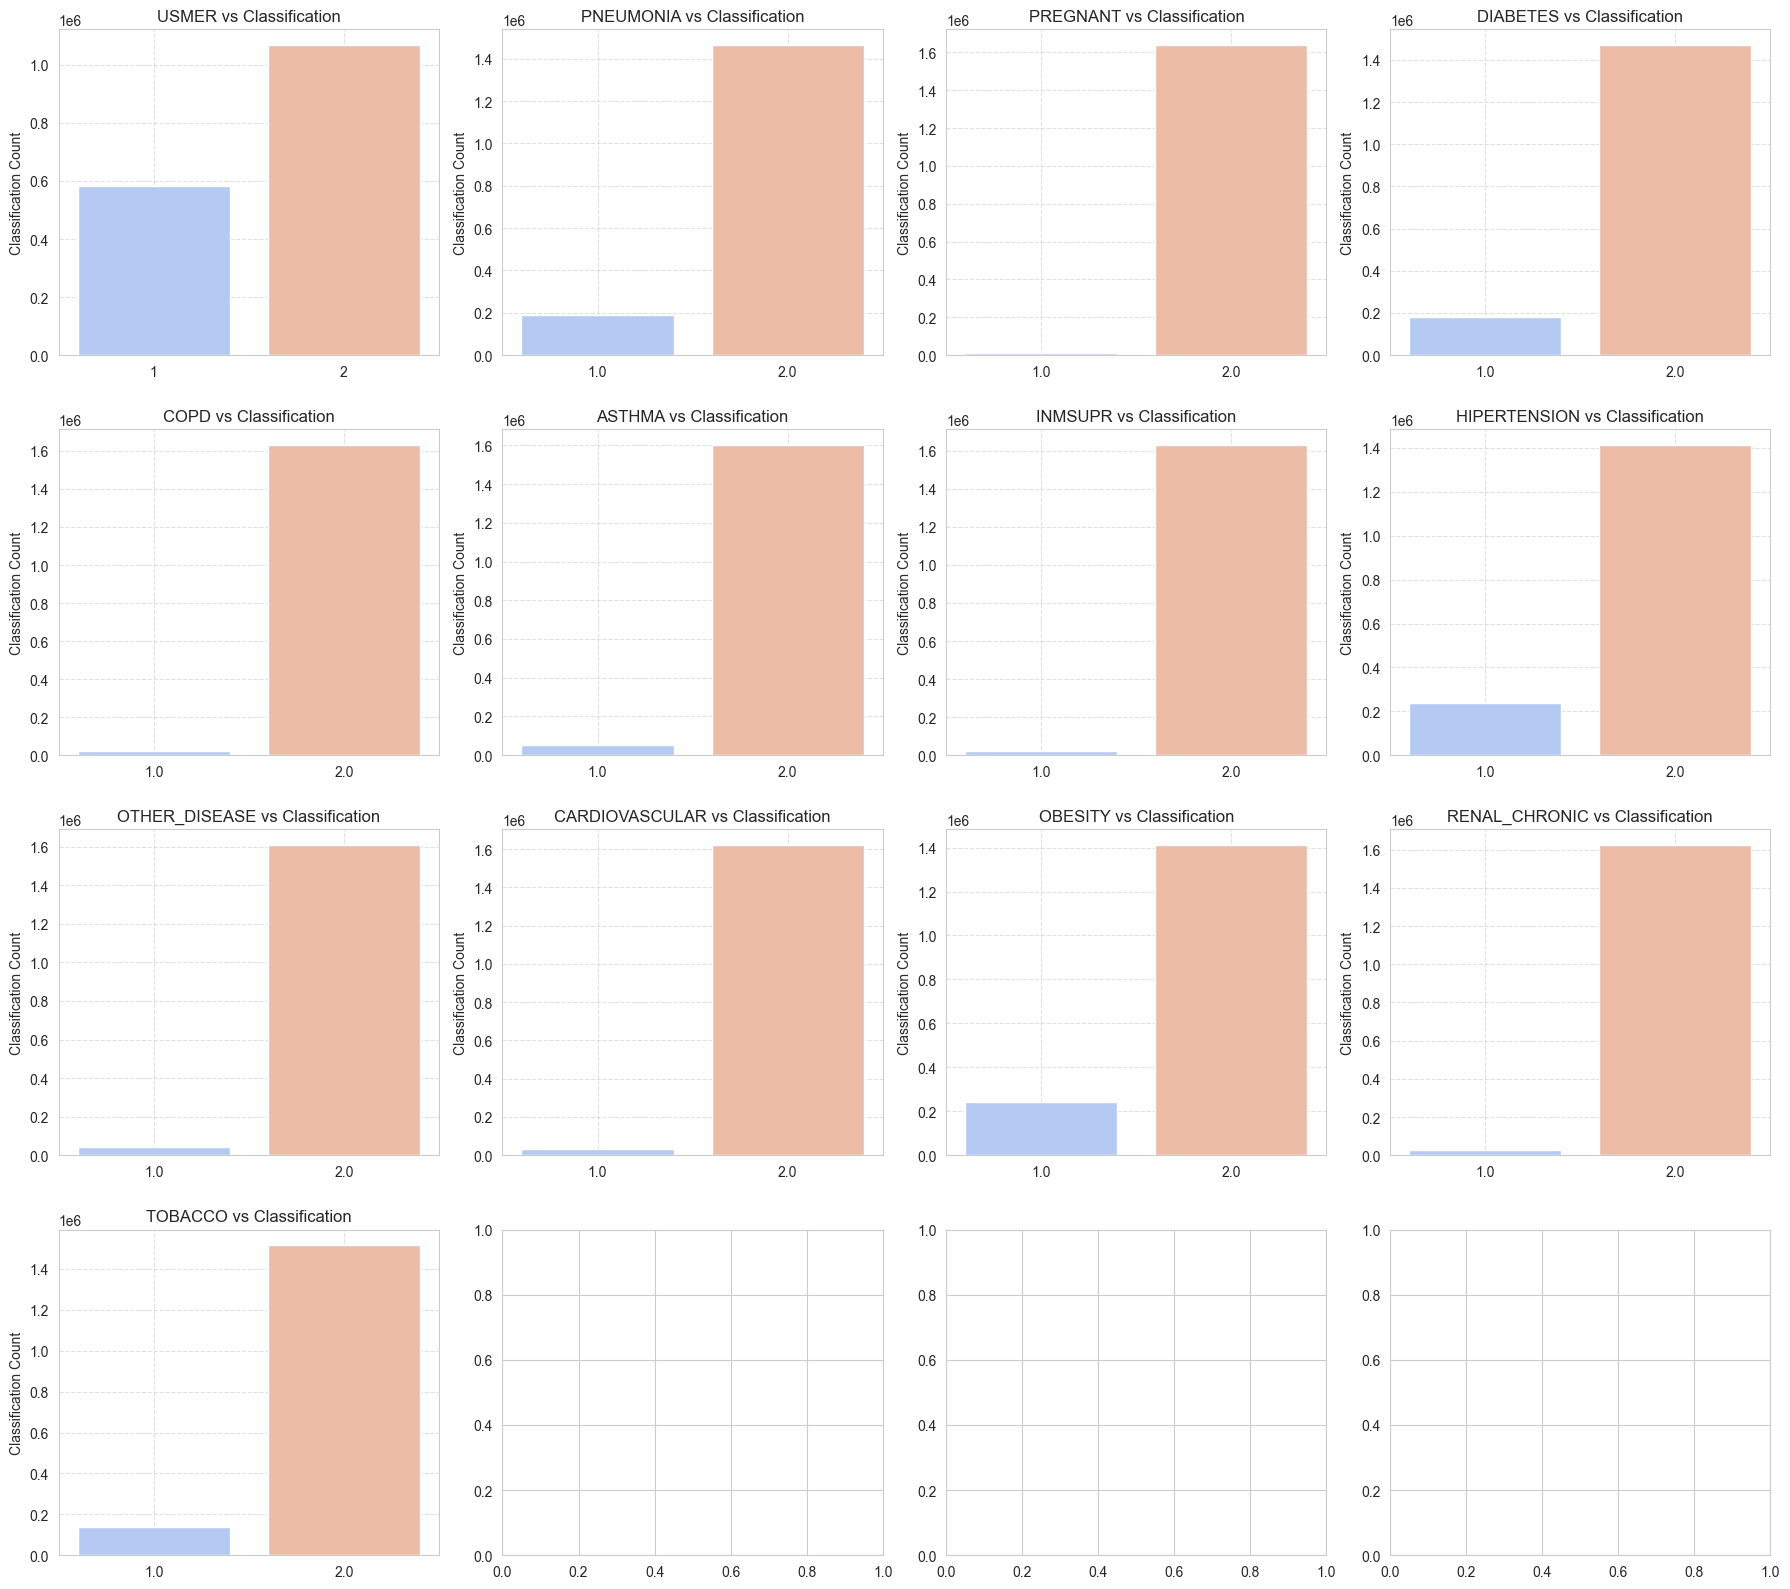

In [25]:
fig, axes = plt.subplots(4, 4, figsize=(18, 16))

for i, condition in enumerate(conditions):
    row, col = divmod(i, 4) 
    ax = axes[row, col]

    sns.barplot(df.groupby(condition)["CLASIFFICATION_FINAL"].sum(), ax=ax, palette='coolwarm')

    ax.set_title(f"{condition} vs Classification", fontsize=12)
    ax.set_xlabel("") 
    ax.set_ylabel("Classification Count")
    ax.grid(True, linestyle="--", alpha=0.6) 

# Adjust layout
plt.tight_layout()
plt.show()
